In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [39]:
#importing Dataset

iris=datasets.load_iris()

In [40]:
#Creating DataFrame
df=pd.DataFrame({
    'x':iris.data[:,0],
    'y':iris.data[:,1],
    'cluster':iris.target
})

In [41]:
df

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [42]:
centroids={}
for i in range(3):
    result_list=[]
    result_list.append(df.loc[df['cluster']==i]['x'].mean())
    result_list.append(df.loc[df['cluster']==i]['y'].mean())
    
    centroids[i]=result_list

In [43]:
centroids

{0: [5.005999999999999, 3.428000000000001],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.9739999999999998]}

Text(0, 0.5, 'Sepal Width')

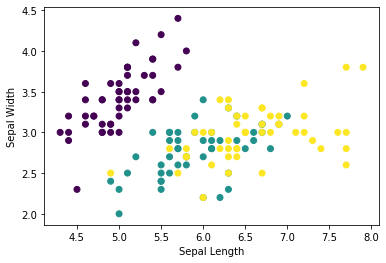

In [44]:
#ploting Scatterplot

plt.scatter(df['x'],df['y'],c=iris.target)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

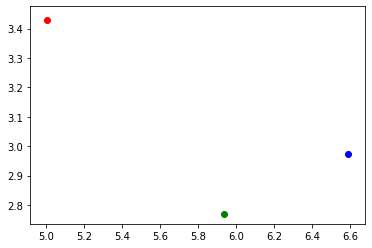

In [45]:
#Ploting Centriods

color_map={0:'r',1:'g',2:'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],color=color_map[i])
plt.show()

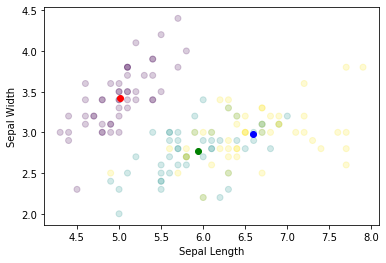

In [46]:
#Ploting scatterplots along with centroids

plt.scatter(df['x'],df['y'],c=iris.target,alpha=0.2)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
color_map={0:'r',1:'g',2:'b'}
for i in range(3):
    plt.scatter(centroids[i][0],centroids[i][1],color=color_map[i])
plt.show()

In [58]:
def assignment(df,centroids):
    for i in range(3):
        df['distance from_{}'.format(i)]= (
            np.sqrt(
                (df['x']-centroids[i][0])**2
                +(df['y']-centroids[i][1])**2
            )
        )
    centroids_distance_cols=['distance_from_{}'.format(i) for i in centroids[i]]
    df['closest']=df.loc[:,centroids_distance_cols].idxmin(axis=1)
    df['closest']=df['clostest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x: colmap[x])
    return df

In [56]:
df=assignment(df,centroids)
df

KeyError: "None of [Index(['distance_from_0', 'distance_from_1', 'distance_from_2'], dtype='object')] are in the [columns]"